In [ ]:
#!pip install matplotlib_inline

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina', quality=100)
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from geopy.geocoders import Nominatim
import folium

In [3]:
# Load datasets
nyc_category_counts = pd.read_csv('nyc_category_counts.csv')
nyc_category_frequencies = pd.read_csv('nyc_category_frequencies.csv')
nyc_health_borough = pd.read_csv('nyc_health_borough.csv')
nyc_df = pd.read_csv('nyc_df.csv')

In [4]:
nyc_category_counts.head(3) # View count dummy variable table

,Neighborhood,AIDS Resource,Acupuncture Clinic,Alternative Medicine Clinic,Ambulance Service,Anesthesiologist,Assisted Living Service,Blood Bank,Cardiologist,Chiropractor,...,Psychiatrist,Psychologist,Radiologist,Rehabilitation Center,Respiratory Doctor,Sports Medicine Clinic,Urgent Care Center,Urologist,Veterinarian,Weight Loss Center
0,Allerton,0,0,0,0,0,2,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,Annadale,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arden Heights,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
nyc_category_frequencies.head(3) # View frequency dummy variable table

,Neighborhood,AIDS Resource,Acupuncture Clinic,Alternative Medicine Clinic,Ambulance Service,Anesthesiologist,Assisted Living Service,Blood Bank,Cardiologist,Chiropractor,...,Psychiatrist,Psychologist,Radiologist,Rehabilitation Center,Respiratory Doctor,Sports Medicine Clinic,Urgent Care Center,Urologist,Veterinarian,Weight Loss Center
0,Allerton,0.0,0.0,0.0,0.00,0.0,0.117647,0.0,0.0,0.235294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,Annadale,0.0,0.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,Arden Heights,0.0,0.0,0.0,0.00,0.0,0.250000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0


In [9]:
print(nyc_health_borough.shape)
nyc_health_borough.head() # View shape and head of health dataframe

(5864, 10)


,Unnamed: 0,Venue,Category,Latitude_x,Longitude_x,Neighborhood,ZIP,Borough,Longitude_y,Latitude_y
0,0,Wakefield Eye Care,Optometrist,40.898682,-73.849352,Wakefield,10466,Bronx,-73.847201,40.894705
1,1,Advanced Dental Group,Dentist,40.875278,-73.828492,Co-op City,10475,Bronx,-73.829939,40.874294
2,2,Creating Smiles,Dentist,40.871558,-73.830285,Co-op City,10475,Bronx,-73.829939,40.874294
3,3,NYC Health & Hospitals,Medical Center,40.873701,-73.826771,Co-op City,10475,Bronx,-73.829939,40.874294
4,4,Montefiore Medical Group,Physician,40.877116,-73.828470,Co-op City,10475,Bronx,-73.829939,40.874294


In [5]:
# Create a copy to make changes without impacting original table
nyc_health_borough1 = nyc_health_borough.copy()
# Get types from Dataframe
nyc_health_borough1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5864 entries, 0 to 5863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Venue         5864 non-null   object 
 1   Category      5864 non-null   object 
 2   Latitude_x    5864 non-null   float64
 3   Longitude_x   5864 non-null   float64
 4   Neighborhood  5864 non-null   object 
 5   ZIP           5864 non-null   int64  
 6   Borough       5864 non-null   object 
 7   Longitude_y   5864 non-null   float64
 8   Latitude_y    5864 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 412.4+ KB


In [6]:
# Isolate Category, Neighborhood Lat and Lon for plotting purposes
df = nyc_health_borough1[['Category', 'Latitude_y', 'Longitude_y']]
df.head() 

,Category,Latitude_y,Longitude_y
0,Chiropractor,40.865788,-73.859319
1,Home Health Care Service,40.865788,-73.859319
2,Nutritionist,40.865788,-73.859319
3,Chiropractor,40.865788,-73.859319
4,Dentist,40.865788,-73.859319


## Plot Latitude and Longitude in Scatter Plot, Coloured by Category

Text(0, 0.5, 'Latitude')

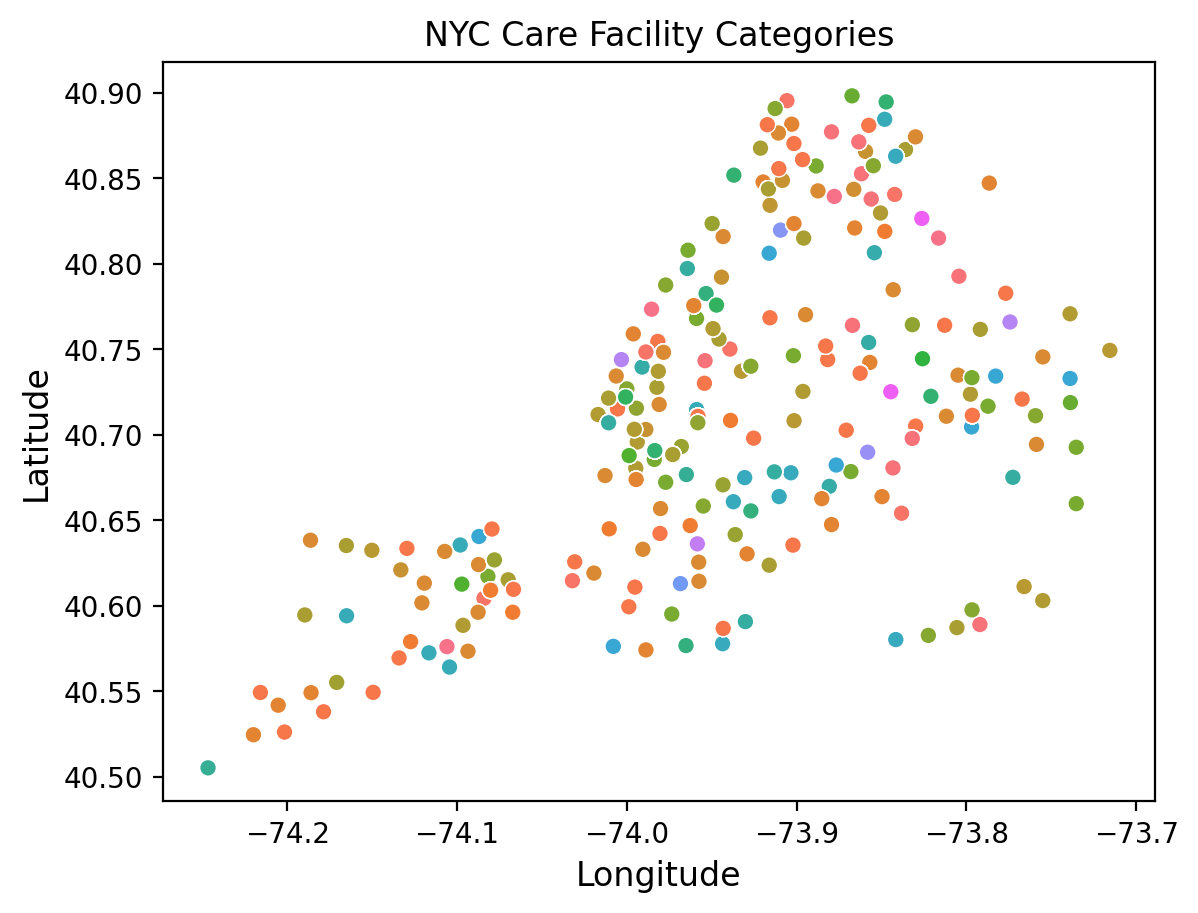

In [12]:
# Latlon of neighborhoods
sns.scatterplot(x=df['Longitude_y'], y=df['Latitude_y'], hue=df['Category'], legend=False)
plt.title('NYC Care Facility Categories')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

In [13]:
# Isolate Category, lat and lon of Venues
df1 = nyc_health_borough1[['Category', 'Longitude_x', 'Latitude_x']]
df1.head()

,Category,Longitude_x,Latitude_x
0,Chiropractor,-73.856269,40.856519
1,Home Health Care Service,-73.855896,40.855880
2,Nutritionist,-73.856801,40.859098
3,Chiropractor,-73.859463,40.864864
4,Dentist,-73.858484,40.863214


Text(0, 0.5, 'Latitude')

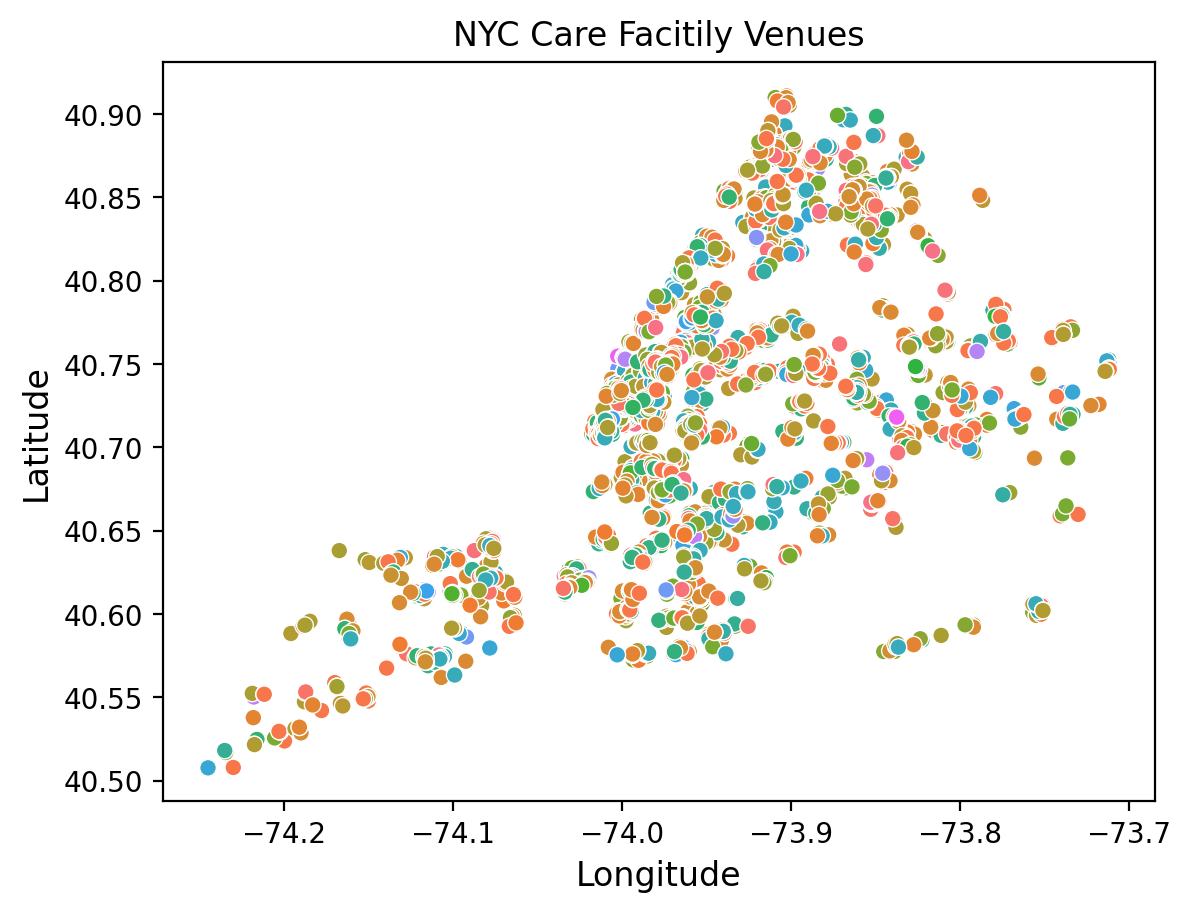

In [15]:
# latlon of venues
sns.scatterplot(x=df1['Longitude_x'], y=df1['Latitude_x'], hue=df1['Category'], legend=False)
plt.title('NYC Care Facitily Venues')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

## Clustering Care Facilities in NYC

In [16]:
# Set y df to category
y_df1 = df1['Category']
# set x df to lat lon of all care facility venues
x_df1 = df1.drop(['Category'], axis=1)
# convert x df into 2-dimensional numpy array
X = x_df1.to_numpy()

## Get Venue Clusters Using Kmeans

In [18]:
# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# fit and transform x df from above 
df_scaled1 = scaler.fit_transform(x_df1.to_numpy()) 

# Columns remain lat lon of care facilities
df_scaled1 = pd.DataFrame(df_scaled1, columns=[
  'Longitude_x', 'Latitude_x'])

# Convert scaled df to numpy array 
print("Scaled Dataset Using MinMaxScaler")
df_scaled = df_scaled1.to_numpy() 

Scaled Dataset Using MinMaxScaler


In [76]:
# Define Kmeans clustering function
def plot_distortion(df_scaled,max_clusters = 10): 
    """
    Receives a numpy array as input and plots the distortion as a function of
    the number of clusters (also known as an 'elbow plot'). Used to select the
    optimal number of clusters. 
    """
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(df_scaled)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters', fontsize=12)
    plt.ylabel('Distortion', fontsize=12)
    plt.show()

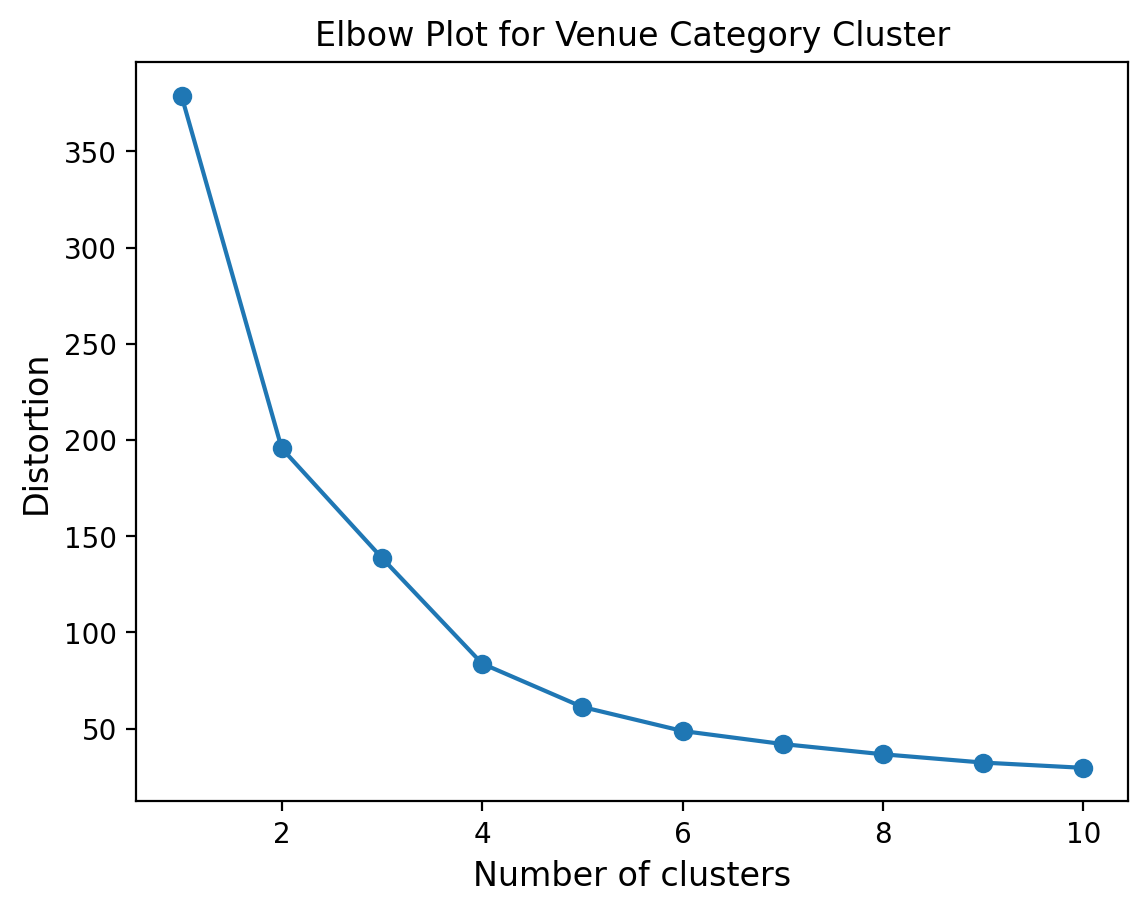

In [77]:
# Plot the elbow plot to determine optimal number of clusters
plt.title('Elbow Plot for Venue Category Cluster')
plot_distortion(df_scaled,max_clusters=10)

In [25]:
# Instantiate KMeans
km = KMeans(n_clusters=5, 
            n_init=15, 
            random_state=0)

In [26]:
# Fit our data using KMeans
y_km = km.fit_predict(df_scaled)

### Define Kmeans Plot Cluster Function

In [23]:
# Define Kmeans plot clustering function
def plot_clusters(X,y_res, plt_cluster_centers = False): 
    """
    Creates a scatter plot and assigns colours to data point according to 
    clustering labels.
    """
   
   
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

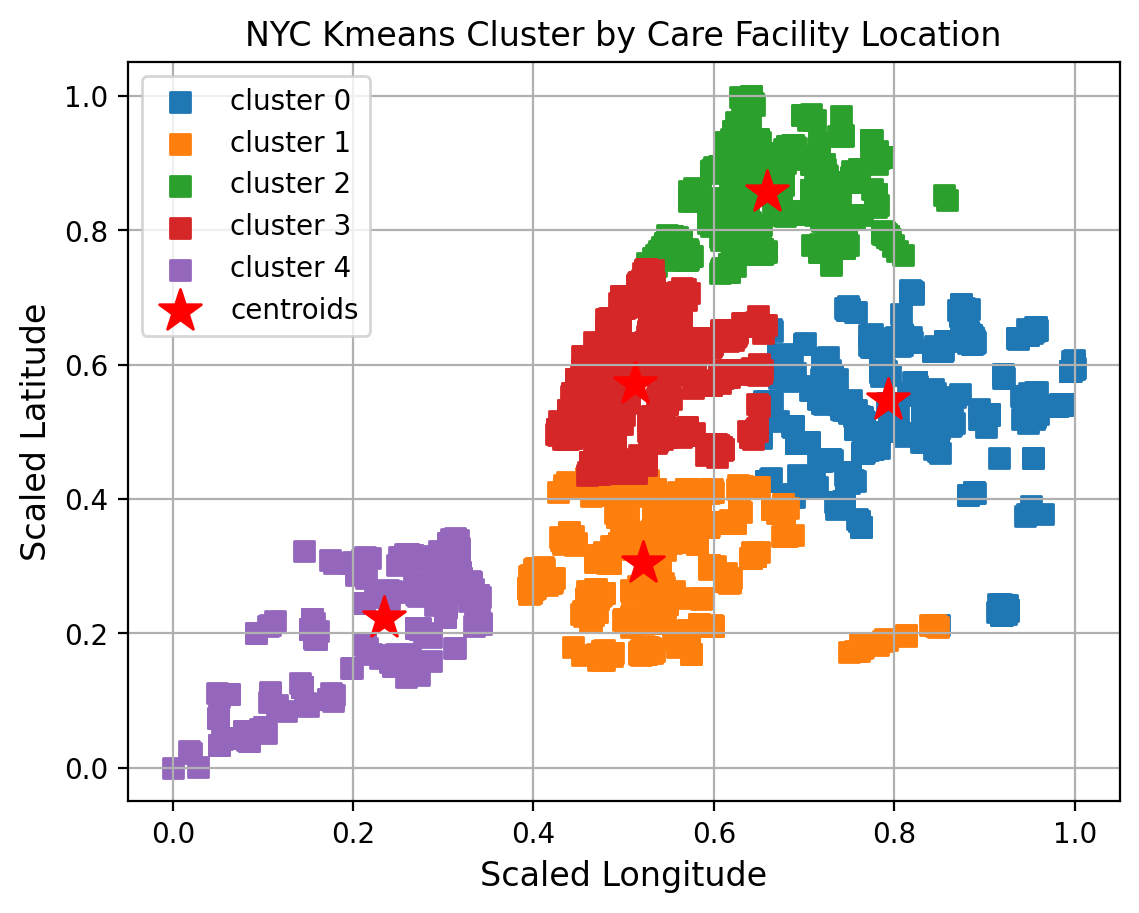

In [30]:
# Plot care facility lat lons using Kmeans
plt.title('NYC Kmeans Cluster by Care Facility Location')
plt.xlabel('Scaled Longitude', fontsize=12)
plt.ylabel('Scaled Latitude', fontsize=12)
plot_clusters(df_scaled, y_km, plt_cluster_centers= True) 

In [35]:
y_df = pd.DataFrame(nyc_health_borough1[['Neighborhood', 'Category']].value_counts())
y_df = y_df.reset_index()
y_df['Category Counts'] = y_df[0]
y_df = y_df.drop([0], axis=1)
y_df = y_df.sort_values(by='Neighborhood', ascending=True)
y_df

,Neighborhood,Category,Category Counts
331,Allerton,Dentist,4
1001,Allerton,Nutritionist,2
343,Allerton,Chiropractor,4
1936,Allerton,Physical Therapy Clinic,1
877,Allerton,Assisted Living Service,2
...,...,...,...
1284,Yorkville,Dermatologist,1
1285,Yorkville,Dentist,1
1286,Yorkville,Anesthesiologist,1
1278,Yorkville,Medical Lab,1


In [36]:
# Create list with unique neighborhood names
hood_list = nyc_health_borough1['Neighborhood'].unique() 

In [37]:
my_dict = {}

# This loop will iterate over each neighborhood and add
# the top category types for each while appending 0s to the end if they do not 
# contain enough categories
for hood in hood_list:
    #print(hood)
    df_filter = nyc_health_borough1[nyc_health_borough1['Neighborhood'] == hood]
    #print(df_filter['Category'].value_counts())
        
    if len(list(df_filter['Category'].value_counts()[:5].index)) == 5:
        my_dict[hood] = list(df_filter['Category'].value_counts()[:5].index)
    
    elif len(list(df_filter['Category'].value_counts()[:5].index)) == 4:
        to_list = list(df_filter['Category'].value_counts()[:4].index)
        #print(to_list)
        to_list.append('0')
        my_dict[hood] = to_list
        
    elif len(list(df_filter['Category'].value_counts()[:5].index)) == 3:
        to_list = list(df_filter['Category'].value_counts()[:3].index)
        #print(to_list)
        to_list.append('0')
        to_list.append('0')
        my_dict[hood] = to_list   
        
    elif len(list(df_filter['Category'].value_counts()[:5].index)) == 2:
        to_list = list(df_filter['Category'].value_counts()[:2].index)
        #print(to_list)
        to_list.append('0')
        to_list.append('0')
        to_list.append('0')
        my_dict[hood] = to_list
        
    else: 
        to_list = list(df_filter['Category'].value_counts()[:5].index)
        #print(to_list)
        to_list.append('0')
        to_list.append('0')
        to_list.append('0')
        to_list.append('0')
        my_dict[hood] = to_list

In [38]:
# Convert dictionary into dataframe
top_venues1 = pd.DataFrame(data=my_dict).T 
top_venues = top_venues1.reset_index() 

# Rename the columns
top_venues.columns = ['Neighborhood', '1st', '2nd', '3rd', '4th', '5th'] 

# Display dataframe with most common categories ordered left to right
top_venues 

,Neighborhood,1st,2nd,3rd,4th,5th
0,Allerton,Chiropractor,Dentist,Nutritionist,Assisted Living Service,Home Health Care Service
1,Annadale,Dentist,Doctor's Office,Ambulance Service,0,0
2,Arden Heights,Veterinarian,Assisted Living Service,Nutritionist,Physical Therapy Clinic,0
3,Arlington,Healthcare Clinic,0,0,0,0
4,Arrochar,Assisted Living Service,Dentist,Obstetrician Gynecologist (Ob-gyn),Medical Center,Acupuncture Clinic
...,...,...,...,...,...,...
222,Woodhaven,Dentist,Doctor's Office,Health and Medicine,Physical Therapy Clinic,Optometrist
223,Woodlawn,Medical Lab,Emergency Room,Doctor's Office,Hospital,Pediatrician
224,Woodrow,Veterinarian,Health and Medicine,Dentist,Physical Therapy Clinic,0
225,Woodside,Dentist,Health and Medicine,Chiropractor,Healthcare Clinic,Ophthalmologist


In [49]:
# Cluster neighbor hoods by category frequency
# set number of clusters
kclusters = 4

# Drop neighborhood from clustering process
category_clustering = nyc_category_frequencies.drop('Neighborhood', axis=1) 

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(category_clustering)

In [ ]:
# Insert column with cluster label as the first column
top_venues.insert(0, 'Cluster Labels', kmeans.labels_)
top_venues

### Get list of neighborhoods that are in nyc_df but not nyc_health_borough

In [41]:
nyc_not_in = set(nyc_df['Neighborhood']).difference(nyc_health_borough['Neighborhood'])
nyc_not_in

{'Bay Terrace, Staten Island',
 'Bedford Park',
 'Bedford Stuyvesant',
 'Belle Harbor',
 'Bellerose',
 'Bergen Beach',
 'Bloomfield',
 'Breezy Point',
 'Broad Channel',
 'Brookville',
 'Bulls Head',
 'Butler Manor',
 'Charleston',
 'Claremont Village',
 'Clifton',
 'Concourse Village',
 'Country Club',
 'Ditmas Park',
 'Douglaston',
 'Eastchester',
 'Edgemere',
 'Edgewater Park',
 'Elm Park',
 'Eltingville',
 'Emerson Hill',
 'Erasmus',
 'Floral Park',
 'Forest Hills Gardens',
 'Graniteville',
 'Grasmere',
 'Heartland Village',
 'High  Bridge',
 'Highland Park',
 'Homecrest',
 'Hudson Yards',
 'Huguenot',
 'Hunts Point',
 'Laurelton',
 'Lighthouse Hill',
 'Little Italy',
 'Madison',
 'Malba',
 'Manhattanville',
 'Marine Park',
 'Middle Village',
 'Mill Basin',
 'Mill Island',
 'Morris Park',
 'Neponsit',
 'Noho',
 'North Riverdale',
 'Oakwood',
 'Paerdegat Basin',
 'Pelham Bay',
 'Port Ivory',
 'Port Morris',
 'Ravenswood',
 'Rego Park',
 'Remsen Village',
 'Richmond Valley',
 'Roxbury

In [56]:
# Get the neighborhoods from original nyc_df create new df where empty neighborhoods
# are excluded.  Shapes must match.
nyc_merged = nyc_df[~nyc_df['Neighborhood'].isin(nyc_not_in)]
nyc_merged = nyc_merged.drop(['Unnamed: 0'], axis=1)
nyc_merged

,Neighborhood,Borough,Latitude,Longitude
0,Wakefield,Bronx,-73.847201,40.894705
1,Co-op City,Bronx,-73.829939,40.874294
3,Fieldston,Bronx,-73.905643,40.895437
4,Riverdale,Bronx,-73.912585,40.890834
5,Kingsbridge,Bronx,-73.902818,40.881687
...,...,...,...,...
299,Kingsbridge Heights,Bronx,-73.901523,40.870392
302,Hammels,Queens,-73.805530,40.587338
303,Bayswater,Queens,-73.765968,40.611322
304,Queensbridge,Queens,-73.945631,40.756091


In [57]:
# Merge top venues with nyc neighborhood dataframe
nyc_merged = nyc_merged.join(top_venues.set_index('Neighborhood'), on='Neighborhood')

In [58]:
nyc_merged

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st,2nd,3rd,4th,5th
0,Wakefield,Bronx,-73.847201,40.894705,1,Optometrist,0,0,0,0
1,Co-op City,Bronx,-73.829939,40.874294,0,Dentist,Health and Medicine,Physical Therapy Clinic,Chiropractor,Medical Center
3,Fieldston,Bronx,-73.905643,40.895437,0,Dentist,Health and Medicine,Nutritionist,Urgent Care Center,Hospital
4,Riverdale,Bronx,-73.912585,40.890834,0,Health and Medicine,Dentist,Doctor's Office,Nursing Home,0
5,Kingsbridge,Bronx,-73.902818,40.881687,0,Health and Medicine,Dentist,Physical Therapy Clinic,Nursing Home,Physician
...,...,...,...,...,...,...,...,...,...,...
299,Kingsbridge Heights,Bronx,-73.901523,40.870392,0,Home Health Care Service,Hospital,Health and Medicine,Dentist,0
302,Hammels,Queens,-73.805530,40.587338,0,Dentist,Physical Therapy Clinic,Healthcare Clinic,0,0
303,Bayswater,Queens,-73.765968,40.611322,1,Physician,Mental Health Service,Mental Health Clinic,Nursing Home,Healthcare Clinic
304,Queensbridge,Queens,-73.945631,40.756091,1,Healthcare Clinic,0,0,0,0


In [59]:
# Filter table by cluster
cluster_1 = nyc_merged[nyc_merged['Cluster Labels'] == 0]
# Print shape to see number of neighborhoods in cluster 1
print(cluster_1.shape)
cluster_1

(117, 10)


,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st,2nd,3rd,4th,5th
1,Co-op City,Bronx,-73.829939,40.874294,0,Dentist,Health and Medicine,Physical Therapy Clinic,Chiropractor,Medical Center
3,Fieldston,Bronx,-73.905643,40.895437,0,Dentist,Health and Medicine,Nutritionist,Urgent Care Center,Hospital
4,Riverdale,Bronx,-73.912585,40.890834,0,Health and Medicine,Dentist,Doctor's Office,Nursing Home,0
5,Kingsbridge,Bronx,-73.902818,40.881687,0,Health and Medicine,Dentist,Physical Therapy Clinic,Nursing Home,Physician
6,Marble Hill,Manhattan,-73.910660,40.876551,0,Dentist,Physical Therapy Clinic,Assisted Living Service,Optometrist,Pediatrician
...,...,...,...,...,...,...,...,...,...,...
291,Prince's Bay,Staten Island,-74.201526,40.526264,0,Dentist,Internal Medicine Doctor,Doctor's Office,Health and Medicine,Medical Lab
297,Bronxdale,Bronx,-73.861726,40.852723,0,Dentist,Home Health Care Service,Optometrist,Medical Center,Pediatrician
298,Allerton,Bronx,-73.859319,40.865788,0,Chiropractor,Dentist,Nutritionist,Assisted Living Service,Home Health Care Service
299,Kingsbridge Heights,Bronx,-73.901523,40.870392,0,Home Health Care Service,Hospital,Health and Medicine,Dentist,0


In [60]:
# Filter table by cluster
cluster_2 = nyc_merged[nyc_merged['Cluster Labels'] == 1]
# Print shape to see number of neighborhoods in cluster 2
print(cluster_2.shape)
cluster_2

(91, 10)


,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st,2nd,3rd,4th,5th
0,Wakefield,Bronx,-73.847201,40.894705,1,Optometrist,0,0,0,0
7,Woodlawn,Bronx,-73.867315,40.898273,1,Medical Lab,Emergency Room,Doctor's Office,Hospital,Pediatrician
10,Baychester,Bronx,-73.835798,40.866858,1,Healthcare Clinic,Assisted Living Service,0,0,0
12,City Island,Bronx,-73.786488,40.847247,1,Doctor's Office,Physical Therapy Clinic,0,0,0
15,Morris Heights,Bronx,-73.919672,40.847898,1,Health and Medicine,Nurse,Physical Therapy Clinic,Medical Center,Dentist
...,...,...,...,...,...,...,...,...,...,...
283,Dumbo,Brooklyn,-73.988753,40.703176,1,Acupuncture Clinic,Health and Medicine,Physician,Nurse,Veterinarian
287,Egbertville,Staten Island,-74.127272,40.579119,1,Nursing Home,Nutritionist,Hospice,Assisted Living Service,0
303,Bayswater,Queens,-73.765968,40.611322,1,Physician,Mental Health Service,Mental Health Clinic,Nursing Home,Healthcare Clinic
304,Queensbridge,Queens,-73.945631,40.756091,1,Healthcare Clinic,0,0,0,0


In [61]:
# Filter table by cluster
cluster_3 = nyc_merged[nyc_merged['Cluster Labels'] == 2]
# Print shape to see number of neighborhoods in cluster 3
print(cluster_3.shape)
cluster_3

(8, 10)


,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st,2nd,3rd,4th,5th
9,Williamsbridge,Bronx,-73.857446,40.881039,2,Dentist,0,0,0,0
14,University Heights,Bronx,-73.910416,40.855727,2,Dentist,0,0,0,0
35,Spuyten Duyvil,Bronx,-73.917190,40.881395,2,Dentist,0,0,0,0
74,Canarsie,Brooklyn,-73.902093,40.635564,2,Dentist,0,0,0,0
131,Jackson Heights,Queens,-73.882821,40.751981,2,Dentist,Health and Medicine,Veterinarian,0,0
180,"Murray Hill, Queens",Queens,-73.812763,40.764126,2,Dentist,0,0,0,0
251,Richmond Town,Staten Island,-74.134057,40.569606,2,Dentist,0,0,0,0
252,Shore Acres,Staten Island,-74.066678,40.609719,2,Dentist,Health and Medicine,0,0,0


In [62]:
# Filter table by cluster
cluster_4 = nyc_merged[nyc_merged['Cluster Labels'] == 3]
# Print shape to see number of neighborhoods in cluster 4
print(cluster_4.shape)
cluster_4

(11, 10)


,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st,2nd,3rd,4th,5th
52,Sheepshead Bay,Brooklyn,-73.943186,40.586890,3,Health and Medicine,Doctor's Office,Dentist,0,0
67,Red Hook,Brooklyn,-74.012759,40.676253,3,Health and Medicine,Medical Center,Doctor's Office,Optometrist,Hospital
85,Sea Gate,Brooklyn,-74.007873,40.576375,3,Health and Medicine,Mental Health Service,0,0,0
141,East Elmhurst,Queens,-73.867041,40.764073,3,Health and Medicine,Home Health Care Service,0,0,0
165,St. Albans,Queens,-73.758676,40.694445,3,Health and Medicine,0,0,0,0
192,Somerville,Queens,-73.796648,40.597711,3,Health and Medicine,Nursing Home,0,0,0
195,North Corona,Queens,-73.857518,40.754071,3,Health and Medicine,Healthcare Clinic,Chiropractor,General Surgeon,0
202,Grymes Hill,Staten Island,-74.087248,40.624185,3,Health and Medicine,0,0,0,0
230,Old Town,Staten Island,-74.087511,40.596329,3,Chiropractor,Health and Medicine,0,0,0
232,Midland Beach,Staten Island,-74.093483,40.573527,3,Mental Health Service,Health and Medicine,0,0,0


### Merging health dataframe on merged dataframe to get neighborhood value counts

In [63]:
# Merge health df on later merged df
cluster_counts = nyc_health_borough1.merge(nyc_merged, how='inner', on='Neighborhood')
# Drop redundant columns
cluster_counts = cluster_counts.drop(['Longitude_y', 'Latitude_y', 'Borough_y'], axis=1)
cluster_counts.head()

,Venue,Category,Latitude_x,Longitude_x,Neighborhood,ZIP,Borough_x,Latitude,Longitude,Cluster Labels,1st,2nd,3rd,4th,5th
0,Cuomo Family Chiropractic Center,Chiropractor,40.856519,-73.856269,Allerton,10461,Bronx,-73.859319,40.865788,0,Chiropractor,Dentist,Nutritionist,Assisted Living Service,Home Health Care Service
1,Companion Angels Home Care Solutions,Home Health Care Service,40.855880,-73.855896,Allerton,10461,Bronx,-73.859319,40.865788,0,Chiropractor,Dentist,Nutritionist,Assisted Living Service,Home Health Care Service
2,Ww,Nutritionist,40.859098,-73.856801,Allerton,10469,Bronx,-73.859319,40.865788,0,Chiropractor,Dentist,Nutritionist,Assisted Living Service,Home Health Care Service
3,Marrone Chiropractic,Chiropractor,40.864864,-73.859463,Allerton,10469,Bronx,-73.859319,40.865788,0,Chiropractor,Dentist,Nutritionist,Assisted Living Service,Home Health Care Service
4,Williamsbridge Dental,Dentist,40.863214,-73.858484,Allerton,10469,Bronx,-73.859319,40.865788,0,Chiropractor,Dentist,Nutritionist,Assisted Living Service,Home Health Care Service


### Cluster 1

In [64]:
# Filter merged table for first cluster
cluster_1_counts = cluster_counts[cluster_counts['Cluster Labels'] == 0]
# Filter to Category
cluster_1_counts = cluster_1_counts['Category']
# Get value counts of categories, reset index.
cluster_1_counts = cluster_1_counts.value_counts().reset_index()
# Rename columns
cluster_1_counts = cluster_1_counts.rename(columns={'index': 'Category',
                                                    'Category': 'Category Counts'
                                                   }
                                          )
cluster_1_counts

,Category,Category Counts
0,Dentist,858
1,Health and Medicine,407
2,Doctor's Office,313
3,Physical Therapy Clinic,226
4,Physician,205
5,Optometrist,175
6,Medical Center,143
7,Veterinarian,115
8,Chiropractor,100
9,Healthcare Clinic,99


### Cluster 2

In [65]:
# Filter merged table for first cluster
cluster_2_counts = cluster_counts[cluster_counts['Cluster Labels'] == 1]
# Filter to Category
cluster_2_counts = cluster_2_counts['Category']
# Get value counts of categories, reset index.
cluster_2_counts = cluster_2_counts.value_counts().reset_index()
cluster_2_counts = cluster_2_counts.rename(columns={'index': 'Category',
                                                    'Category': 'Category Counts'
                                                   }
                                          )
cluster_2_counts

,Category,Category Counts
0,Health and Medicine,191
1,Doctor's Office,163
2,Physician,122
3,Dentist,121
4,Hospital,121
5,Medical Center,116
6,Veterinarian,103
7,Physical Therapy Clinic,83
8,Healthcare Clinic,79
9,Optometrist,63


### Cluster 3

In [66]:
# Filter merged table for first cluster
cluster_3_counts = cluster_counts[cluster_counts['Cluster Labels'] == 2]
# Filter to Category
cluster_3_counts = cluster_3_counts['Category']
# Get value counts of categories, reset index.
cluster_3_counts = cluster_3_counts.value_counts().reset_index()
cluster_3_counts = cluster_3_counts.rename(columns={'index': 'Category',
                                                    'Category': 'Category Counts'
                                                   }
                                          )
cluster_3_counts

,Category,Category Counts
0,Dentist,16
1,Health and Medicine,3
2,Veterinarian,1


### Cluster 4

In [67]:
# Filter merged table for first cluster
cluster_4_counts = cluster_counts[cluster_counts['Cluster Labels'] == 3]
# Filter to Category
cluster_4_counts = cluster_4_counts['Category']
# Get value counts of categories, reset index.
cluster_4_counts = cluster_4_counts.value_counts().reset_index()
cluster_4_counts = cluster_4_counts.rename(columns={'index': 'Category',
                                                    'Category': 'Category Counts'
                                                   }
                                          )
cluster_4_counts

,Category,Category Counts
0,Health and Medicine,16
1,Mental Health Service,3
2,Chiropractor,3
3,Doctor's Office,2
4,Home Health Care Service,1
5,Assisted Living Service,1
6,Healthcare Clinic,1
7,General Surgeon,1
8,Medical Center,1
9,Optometrist,1


### Plotting Category-Frequency Clusters in a Map

In [68]:
address = 'New York, NY'
geolocator = Nominatim(user_agent="nyc_clusterer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [69]:
colours = ["#4285f4", "#db4437", "#f4b400", "#0f9d58", "#ab47bc", "#00acc1", "#ff7043", 
           "#9e9d24", "#5c6bc0", "#f06292", "#00796b", "#c2185b", "#7e57c2", "#03a9f4", 
           "#8bc34a", "#fdd835", "#fb8c00", "#8d6e63", "#9e9e9e", "#607d8b"]

In [70]:
# Plotting the Most Common Category Clusters.  Each Colour represents a cluster,
# with like neighborhoods being of the same cluster.

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10,
                          min_zoom=9, max_zoom=15)

# set color scheme for the clusters
rainbow = colours[3:15:3]

# add markers to the map
for lat, lon, neighborhood, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], 
                                  nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(neighborhood) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        weight=2,
        popup=label,
        color='#333333',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

## Get Neighborhood-Venue Count Clusters 

In [71]:
# Recall the dataframe with venue and coordinate information
nyc_health_borough.head(3)

,Venue,Category,Latitude_x,Longitude_x,Neighborhood,ZIP,Borough,Longitude_y,Latitude_y
0,Cuomo Family Chiropractic Center,Chiropractor,40.856519,-73.856269,Allerton,10461,Bronx,-73.859319,40.865788
1,Companion Angels Home Care Solutions,Home Health Care Service,40.855880,-73.855896,Allerton,10461,Bronx,-73.859319,40.865788
2,Ww,Nutritionist,40.859098,-73.856801,Allerton,10469,Bronx,-73.859319,40.865788


In [73]:
# Generate count of venues by neighborhood
venue_neighborhood = nyc_health_borough.groupby('Neighborhood').count().drop(
    ['Category', 'Latitude_x', 'Longitude_x', 'ZIP', 'Borough', 'Longitude_y', 'Latitude_y'],
    axis=1)
venue_neighborhood.head(3)

,Venue
Neighborhood,
Allerton,17
Annadale,4
Arden Heights,4


In [74]:
# Scale the venue count
# Create a scaled data frame
scaled_data = scaler.fit_transform(venue_neighborhood.to_numpy())
venue_neighborhood_scaled = pd.DataFrame(scaled_data)
venue_neighborhood_scaled.columns = ['Venue count']
venue_neighborhood_scaled.head(3)

,Venue count
0,0.092486
1,0.017341
2,0.017341


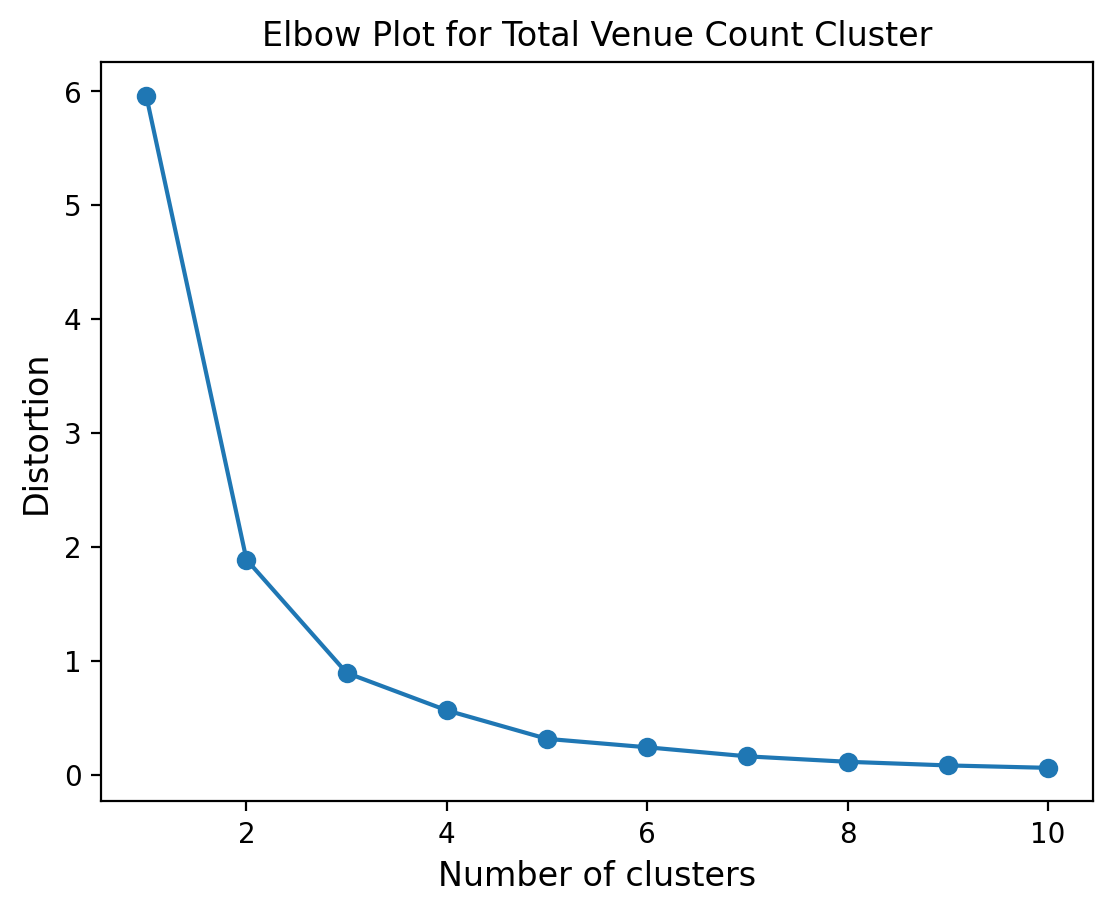

In [78]:
# Determine optimal number of clusters using elbow plot
plt.title('Elbow Plot for Total Venue Count Cluster')
plot_distortion(np.array(venue_neighborhood_scaled),max_clusters=10)

In [79]:
# Instantiate KMeans using values from elbow plot
km = KMeans(n_clusters=3, # clusters we expected 
            n_init=15, # initial runs
            random_state=0)

In [80]:
# Fit our data to the model
y_km = km.fit_predict(venue_neighborhood_scaled)

In [81]:
# Get labels and add to df with neighborhood and venue counts
venue_neighborhood_scaled['Cluster Labels'] = km.labels_
venue_neighborhood_scaled['Neighborhood'] = venue_neighborhood.index
venue_neighborhood_scaled.head(3)

,Venue count,Cluster Labels,Neighborhood
0,0.092486,0,Allerton
1,0.017341,0,Annadale
2,0.017341,0,Arden Heights


In [82]:
# Create a df that contains only the coordinates and neighborhoods
coords = nyc_health_borough[['Neighborhood', 'Latitude_y', 'Longitude_y']].groupby('Neighborhood', as_index=False).agg(
    {'Latitude_y': 'first', 'Longitude_y': 'first'})
coords.head(3)

,Neighborhood,Latitude_y,Longitude_y
0,Allerton,40.865788,-73.859319
1,Annadale,40.538114,-74.178549
2,Arden Heights,40.549286,-74.185887


In [84]:
# Merge the coords and venue_neighborhood_scaled dfs
venue_neighborhood_labeled = pd.merge(coords, venue_neighborhood_scaled, on='Neighborhood')

Text(0, 0.5, 'Latitude')

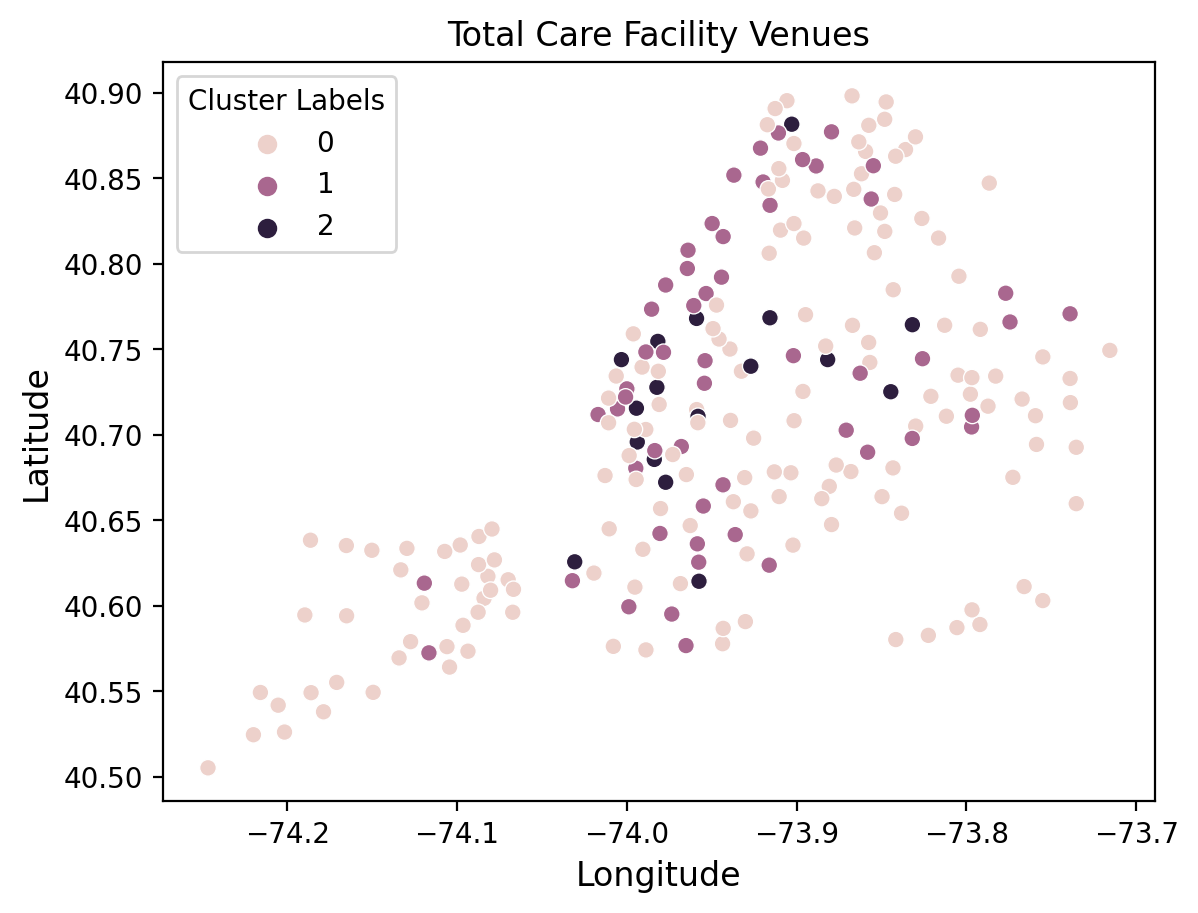

In [88]:
# Visualize the clusters using seaborn and the coordinates as X and Y
sns.scatterplot(x=venue_neighborhood_labeled['Longitude_y'], 
                y=venue_neighborhood_labeled['Latitude_y'],
                hue=venue_neighborhood_labeled['Cluster Labels'], 
                legend=True)
plt.title('Total Care Facility Venues')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

In [87]:
"""Plotting the neighborhoods by total care facility.  Each Colour represents a cluster,
with the neighborhoods that have more care facilities being of the same cluster, and
the neighborhoods with less care facilities a different cluster. Cluster 1 representing the
neighborhoods with the least care facilities, cluster 2 representing the neighborhoods with
a medium number of care facilities, and cluster 3 representing neighborhoods with the most
care facilities."""

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10,
                          min_zoom=9, max_zoom=15)

# set color scheme for the clusters
rainbow = colours[5:15:3]

# add markers to the map
for lat, lon, neighborhood, cluster in zip(venue_neighborhood_labeled['Latitude_y'], venue_neighborhood_labeled['Longitude_y'], 
                                  venue_neighborhood_labeled['Neighborhood'], venue_neighborhood_labeled['Cluster Labels']):
    label = folium.Popup(str(neighborhood) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        weight=2,
        popup=label,
        color='#333333',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters